## Customer Sentiment Analysis: Amazon food items

### Group: 1
### Name: Akanksha Arora, Suranjana Chowdhury, Xiaohong Liu, Sai Meghana Reddy Devarapalli

In [1]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
import copy

2023-04-15 16:34:08.744734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshagrawal/Documents/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import seaborn as sns

In [3]:
data = pd.read_csv('Reviews.csv')                
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(568454, 10)

In [5]:
# Checking if there are duplicates: no duplicates
data.drop_duplicates(inplace=True) 
data.shape     

(568454, 10)

In [6]:
# Drop columns that are not needed 
data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], axis=1, inplace=True)
data.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
#2. Checking if the data has any null values in any column
data.isnull().sum()

Score       0
Summary    27
Text        0
dtype: int64

In [8]:
# Drop rows with missing values
#data.dropna(inplace=True)
#data.shape

In [9]:
#only choose 50000 comments to show the results
#data=data.head(50000)     

In [10]:
#############################################################

In [11]:
df=copy.deepcopy(data)
# Convert 'Text' column to string type
df['Text'] = df['Text'].astype(str)

# Extract informative features
df['length'] = df['Text'].apply(lambda x: len(x.split()))
df['Summary'] = df['Summary'].fillna('')
df['summary_length'] = df['Summary'].apply(lambda x: len(x.split()))

# Calculate the sentiment of the reviews
df['Sentiment'] = np.where(df['Score'] > 3, 'Positive', 'Negative')

# Summarize the data set
print('Number of reviews:', len(df))
print('Number of positive reviews:', len(df[df['Sentiment'] == 'Positive']))
print('Number of negative reviews:', len(df[df['Sentiment'] == 'Negative']))
print('Average review length:', np.mean(df['length']))
print('Average summary length:', np.mean(df['summary_length']))

Number of reviews: 568454
Number of positive reviews: 443777
Number of negative reviews: 124677
Average review length: 80.26402312236347
Average summary length: 4.113101499857509


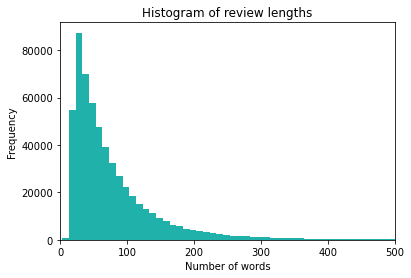

In [12]:
num_bins = int((max(df['length']) - min(df['length'])) / 10)

#Histogram of review lengths
import matplotlib.pyplot as plt
plt.hist(df['length'], bins=num_bins, color='lightseagreen')
plt.title('Histogram of review lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

# Define x-axis limits
plt.xlim([0, 500])

plt.show()

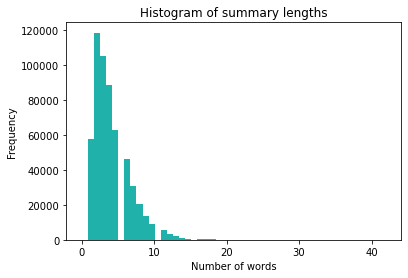

In [13]:
# Histogram of summary lengths
import matplotlib.pyplot as plt
plt.hist(df['summary_length'], bins=50, color='lightseagreen')
plt.title('Histogram of summary lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

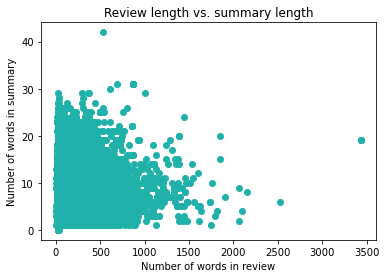

In [14]:
# Scatter plot of review length vs summary length
import matplotlib.pyplot as plt
plt.scatter(df['length'], df['summary_length'], color='lightseagreen')
plt.title('Review length vs. summary length')
plt.xlabel('Number of words in review')
plt.ylabel('Number of words in summary')
plt.show()

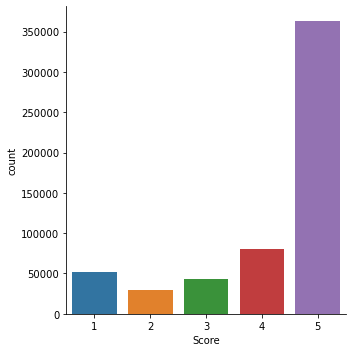

In [17]:
# Scatter plot of review length vs summary length
sns.catplot(data=df, x = 'Score', kind='count')
plt.show()

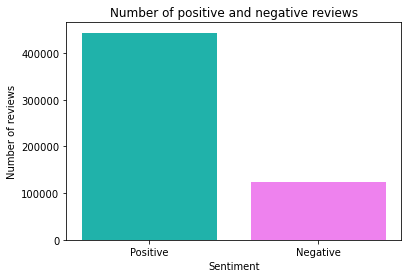

In [18]:
# Bar chart of positive and negative reviews
pos = len(df[df['Sentiment'] == 'Positive'])
neg = len(df[df['Sentiment'] == 'Negative'])
labels = ['Positive', 'Negative']
values = [pos, neg]
colors = ['lightseagreen', 'violet']
plt.bar(labels, values, color=colors)
plt.title('Number of positive and negative reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()

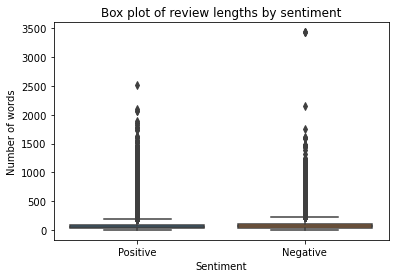

In [19]:
# Box plot of review lengths by sentiment
sns.boxplot(x='Sentiment', y='length', data=df)
plt.title('Box plot of review lengths by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of words')
plt.show()

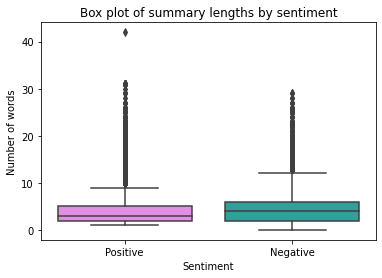

In [20]:
# Box plot of summary lengths by sentiment
import seaborn as sns
sns.boxplot(x='Sentiment', y='summary_length', data=df, palette=['violet', 'lightseagreen'])
plt.title('Box plot of summary lengths by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of words')
plt.show()

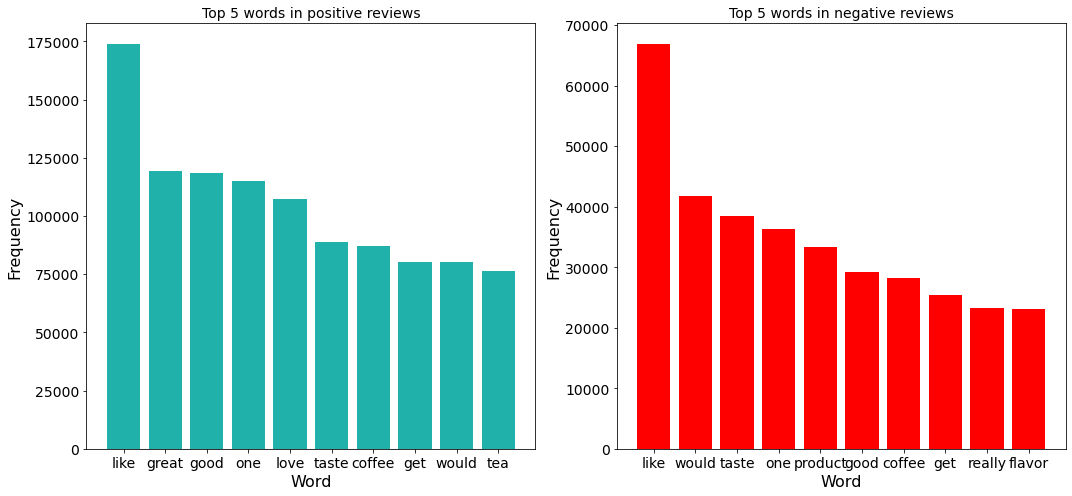

In [21]:
stop_words = set(stopwords.words('english'))
# Add new words to the stopwords list
new_stopwords = ['/><br']
stop_words.update(new_stopwords)

positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Text'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Text'])

positive_word_counts = Counter([word for word in positive_text.lower().split() if word not in stop_words])
negative_word_counts = Counter([word for word in negative_text.lower().split() if word not in stop_words])

top_5_positive_words = dict(positive_word_counts.most_common(10))
top_5_negative_words = dict(negative_word_counts.most_common(10))

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(top_5_positive_words.keys(), top_5_positive_words.values(), color='lightseagreen')
plt.title('Top 5 words in positive reviews', fontsize=14)
plt.xlabel('Word', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(labelsize=14)

plt.subplot(1, 2, 2)
plt.bar(top_5_negative_words.keys(), top_5_negative_words.values(), color='red')
plt.title('Top 5 words in negative reviews', fontsize=14)
plt.xlabel('Word', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

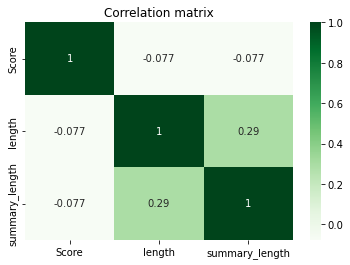

In [22]:
# Plotting a heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df[['Score', 'length', 'summary_length']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation matrix')
plt.show()

# Build a RNN model

Using RNN model to predict a review is good(=1) or bad(=0).

In [23]:
#prepare data,only keep two columns
reviews=copy.deepcopy(data[['Text','Score']])
reviews['Class']=reviews['Score'].apply(lambda x: 1 if x>3 else 0)
reviews.head()

,Text,Score,Class
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


In [24]:
y=reviews['Class'].values
x=reviews['Text'].values
# split datat into training set and testing set
from sklearn.model_selection import train_test_split
np.random.seed(1234)
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
#create a tokenizer,fit on the train
vocab_size=2000
tokenizer = Tokenizer(num_words=vocab_size, oov_token=None)   
tokenizer.fit_on_texts(x_train)

In [26]:
#each review gets a sequence.
x_train_tokenized = tokenizer.texts_to_sequences(x_train)  
x_test_tokenized = tokenizer.texts_to_sequences(x_test)

In [27]:
#let the sequence be the same length
max_words = 50  
x_train_padded = pad_sequences(x_train_tokenized, maxlen=max_words)
x_test_padded = pad_sequences(x_test_tokenized, maxlen=max_words)

In [28]:
# Reshaping the data 
x_train = np.reshape(x_train_padded, (x_train_padded.shape[0], x_train_padded.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
x_test = np.reshape(x_test_padded, (x_test_padded.shape[0],x_test_padded.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1)) 
print("Shape of x_train after reshape :",x_train.shape)
print("Shape of y_train after reshape :",y_train.shape)
print("Shape of X_test after reshape :",x_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of x_train after reshape : (454763, 50, 1)
Shape of y_train after reshape : (454763, 1)
Shape of X_test after reshape : (113691, 50, 1)
Shape of y_test after reshape : (113691, 1)


In [29]:
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
model = models.Sequential()
embedding_dims = 30
model.add(layers.Embedding(vocab_size, embedding_dims, input_length=max_words))
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#embedding: decrease the dimension for easy calculation
#dropout prob is 0.2
#the class is only 1 or 0, so the output activation function is sigmoid

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 30)            60000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 64,101
Trainable params: 64,101
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam',  
             metrics=['accuracy'])

In [32]:
rnn=model.fit(x_train, y_train, epochs=15,validation_data=(x_test, y_test))  

Epoch 1/15
14212/14212 [==============================] - 212s 15ms/step - loss: 0.3303 - accuracy: 0.8588 - val_loss: 0.3046 - val_accuracy: 0.8703
Epoch 2/15
14212/14212 [==============================] - 217s 15ms/step - loss: 0.3193 - accuracy: 0.8635 - val_loss: 0.3682 - val_accuracy: 0.8402
Epoch 3/15
14212/14212 [==============================] - 218s 15ms/step - loss: 0.3390 - accuracy: 0.8551 - val_loss: 0.3216 - val_accuracy: 0.8675
Epoch 4/15
14212/14212 [==============================] - 280s 20ms/step - loss: 0.3776 - accuracy: 0.8335 - val_loss: 0.3812 - val_accuracy: 0.8304
Epoch 5/15
14212/14212 [==============================] - 214s 15ms/step - loss: 0.3718 - accuracy: 0.8370 - val_loss: 0.3386 - val_accuracy: 0.8522
Epoch 6/15
14212/14212 [==============================] - 212s 15ms/step - loss: 0.3486 - accuracy: 0.8494 - val_loss: 0.3987 - val_accuracy: 0.8183
Epoch 7/15
14212/14212 [==============================] - 203s 14ms/step - loss: 0.3839 - accuracy: 0.8308

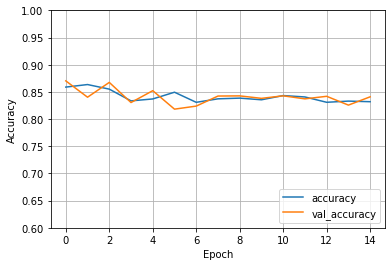

In [33]:
## plot accuracy and val-accuracy vs Epoch
import matplotlib.pyplot as plt
plt.plot(rnn.history['accuracy'], label='accuracy')
plt.plot(rnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

### USE CASES

In [34]:
reviews =[
    "the product is good, but it would be a better idea to add some decor to it",
    "not the worst deal but neither the best one, such a  horrible packing",
    "the is the best deal of my life",
    "havent seen anything like this before"
]

In [35]:
X_new = tokenizer.texts_to_sequences(reviews)
X_new_padded = pad_sequences(X_new,maxlen=max_words)

In [36]:
def decode_pred(pred):
    preds = np.round(pred)
    pred_classes = []
    for pred in preds:
        if pred[0]==0:
            pred_classes.append('bad')
        else:
            pred_classes.append('good')
    return pred_classes

In [37]:
pred = model.predict(X_new_padded)
pred_classes = decode_pred(pred)
pred_classes

1/1 [==============================] - 2s 2s/step


['good', 'bad', 'good', 'good']

In [38]:
pred

array([[0.8500517 ],
       [0.22128451],
       [0.9629333 ],
       [0.89691913]], dtype=float32)

In [39]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()